#                                         Shopify Challenge

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Importing the data set
df = pd.read_csv('data_set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
# Checking the data types
print("(rows,columns) = " ,df.shape ,"\n","Data types:\n" ,df.dtypes)

(rows,columns) =  (5000, 7) 
 Data types:
 order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object


In [4]:
# Checkng the missing values if any

missing_data = df.isnull()

for column in missing_data:
 print(column)
 print(missing_data[column].value_counts())
 print(" ")

order_id
False    5000
Name: order_id, dtype: int64
 
shop_id
False    5000
Name: shop_id, dtype: int64
 
user_id
False    5000
Name: user_id, dtype: int64
 
order_amount
False    5000
Name: order_amount, dtype: int64
 
total_items
False    5000
Name: total_items, dtype: int64
 
payment_method
False    5000
Name: payment_method, dtype: int64
 
created_at
False    5000
Name: created_at, dtype: int64
 


Since there are no "True" values in any of the columns,It is clear that there are no missing values in the data set.

In [5]:
# Checking the stats of the "order_amount" and "total_items"
df[["order_amount","total_items"]].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


According to the above statistics, it seems that there are couple of outliers in our data as the maximum value of both the columns is way more higher than minimum value,25%,50%,&75% IQR's. Let's go ahead and deal with the outliers in our data.

The most common way to detect the outliers is by histogram plot or box plot. 

Text(0.5, 1.0, 'order_amount histogram')

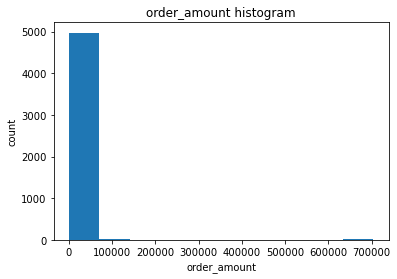

In [6]:
# Plotting histogram using matplotlib
plt.pyplot.hist(df["order_amount"])
plt.pyplot.xlabel("order_amount")
plt.pyplot.ylabel("count")
plt.pyplot.title("order_amount histogram")

It seems that most of our data is located in only one bin according to the above histogram. However, it is very difficult to analyze the range of the bins exactly using visual representation. This can be solved by using numpy histogram where we can get an array of the bin ranges.  

In [7]:
np.set_printoptions(suppress=True)
np.histogram(df["order_amount"],bins = 700)

(array([4934,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   19,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   16,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    9,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

According to the above observation, it is clear that out of 5000 values we have 4937 values pilled up in one bin i.e., about 98.72% of the data lies in the bin range of 0-2000. This demostrates that our data has 2% of outliers. Since we cannot investigate or make any assumptions weather our outliers are genuine or mistaken, For this scenario, the order value ranging above 2000 are considered as outliers and can be neglected.

This step is performed in mySQL, the script for SQL is saved as "DATA_CLEANING".txt" in the reposiotry for verification. This step involves removing the outlires i.e.,the rows whose order amount is greater than $2000.


In [8]:
# Importing the new updated data which performed in SQL
df1 = pd.read_csv('cleaned_data_set.csv')
df1.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Since we have cleaned the data and removed the posiible outliers, we can now calculate the avereage value of our order_amount.

In [9]:
AOV = df1["order_amount"].mean()
print("Average order value =",AOV)

Average order value = 302.58051448247926


The total_items are not considered in the above operation. As total_items differs for each order, it would be more accurate if we can average the order_amount by grouping the total_items.

In [10]:
# Averaging the order_amount by grouping the total_items.
df_grouping = df1[['order_amount', 'total_items']]
df_grouping = df_grouping.groupby(['total_items'],as_index= False).mean()
df_grouping.rename(columns={'order_amount': 'Average_order_amount'}, inplace=True)
df_grouping

,total_items,Average_order_amount
0,1,151.850911
1,2,303.520925
2,3,457.326180
3,4,598.534247
4,5,759.350649
5,6,888.750000
6,8,1064.000000


### Answers to the following questions asked in the challenge

Question 1:Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Answer: I assume that the data cleanig was not done before which had led to unlreliable average which was $3154.13.


Question 2: What metric would you report for this dataset?

Answer: Since the total_items values differs for eaach order amount, I would use average_order_amount for total_items in an order.


Question 3:What is its value?

Answer: The Average order value is 302.58 if the outliers such as order with 2000 total_items are not considered. Also we can get a detail report by looking into Average order amount for total_items which is showed in the output of previous cell.